In [1]:
import pandas as pd
import numpy as np
import os.path
import matplotlib.pyplot as plt
from os import listdir

In [2]:
pathData = "./data/"
datafiles = listdir(pathData)

data = [None] * len(datafiles)

labels = [None] * len(datafiles)

## go through all files in data dir and read csv's 
for i in range(len(datafiles)):
    try:
        data[i] = pd.read_csv(os.path.join(pathData,datafiles[i]))
        labels[i] = datafiles[i][:-4]
    except:
        i = i-1

## if attention in dataframe reads as 0, then replace it nan.
for i in range(len(datafiles)):
    data[i]['Attention'].replace(0,np.nan,inplace=True)

In [4]:
def makePlot(index):
    plt.plot(data[index]['Time'],data[index]['Attention'])
    plt.title(labels[index])
    plt.figtext(.3,0,"mean = {} sd = {}".format(round(np.mean(data[index]['Attention']),5),round(np.std(data[index]['Attention']),5)))
    for i in data[index][data[index].Is_Event == 1]['Time']:
        plt.axvline(x=i,color='r',linestyle='--')

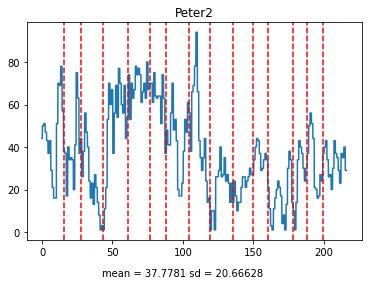

In [5]:
pathResults = './results/'
for i in range(len(datafiles)):
    plt.clf()
    makePlot(i)
    plt.savefig(pathResults + labels[i]+".jpg",bbox_inches='tight')